In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("house_price_prediction.csv")
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
df = df.dropna()

In [4]:
df = pd.get_dummies(df, drop_first=True)

In [6]:
X = df.drop("Price", axis=1)
y = df["Price"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression R2:", r2_lr)

Linear Regression MSE: 78279764120.86241
Linear Regression R2: -0.006181784611834162


In [10]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree MSE:", mse_dt)
print("Decision Tree R2:", r2_dt)

Decision Tree MSE: 160628402306.5775
Decision Tree R2: -1.0646635092389856


In [11]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest R2:", r2_rf)

Random Forest MSE: 83274181705.09029
Random Forest R2: -0.07037835002606019


In [12]:
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest"],
    "MSE": [mse_lr, mse_dt, mse_rf],
    "R2 Score": [r2_lr, r2_dt, r2_rf]
})
comparison

,Model,MSE,R2 Score
0,Linear Regression,7.827976e+10,-0.006182
1,Decision Tree,1.606284e+11,-1.064664
2,Random Forest,8.327418e+10,-0.070378


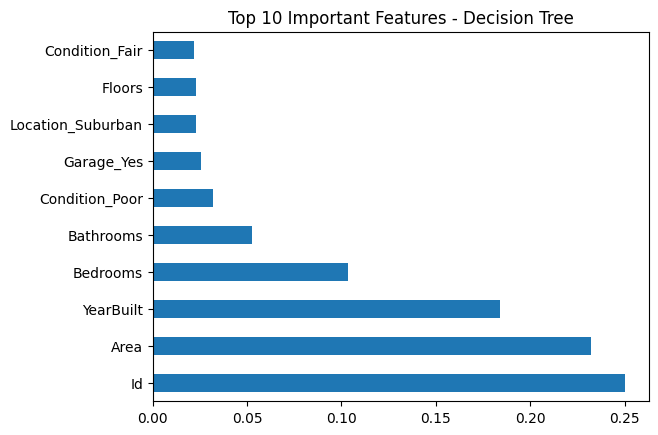

In [13]:
importances_dt = dt.feature_importances_
feat_importance_dt = pd.Series(importances_dt, index=X.columns)
feat_importance_dt.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - Decision Tree")
plt.show()

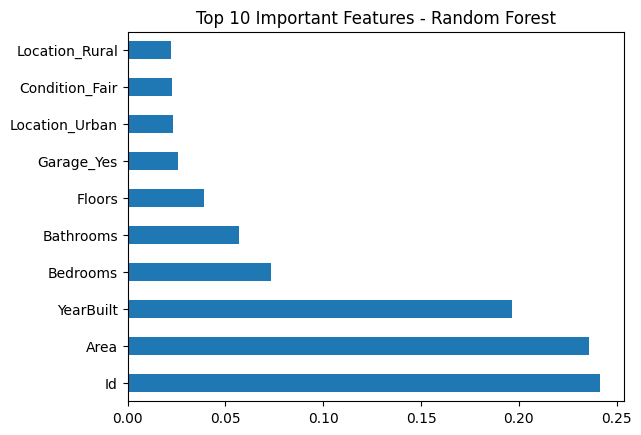

In [14]:
importances_rf = rf.feature_importances_
feat_importance_rf = pd.Series(importances_rf, index=X.columns)
feat_importance_rf.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - Random Forest")
plt.show()

In [15]:
param_grid_dt = {
    "max_depth": [None, 5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_dt = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid_dt,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_dt.fit(X_train, y_train)

print("Best Parameters:", grid_dt.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [16]:
best_dt = grid_dt.best_estimator_

y_pred_dt_tuned = best_dt.predict(X_test)

print("Tuned DT MSE:", mean_squared_error(y_test, y_pred_dt_tuned))
print("Tuned DT R2:", r2_score(y_test, y_pred_dt_tuned))

Tuned DT MSE: 84651052357.2703
Tuned DT R2: -0.0880761827360712


In [17]:
param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5],
}

grid_rf = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid_rf,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

print("Best Parameters:", grid_rf.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [18]:
best_rf = grid_rf.best_estimator_

y_pred_rf_tuned = best_rf.predict(X_test)

print("Tuned RF MSE:", mean_squared_error(y_test, y_pred_rf_tuned))
print("Tuned RF R2:", r2_score(y_test, y_pred_rf_tuned))

Tuned RF MSE: 80922236073.04257
Tuned RF R2: -0.04014723116742425


In [19]:
final_comparison = pd.DataFrame({
    "Model": [
        "Decision Tree (Before)",
        "Decision Tree (After)",
        "Random Forest (Before)",
        "Random Forest (After)"
    ],
    "MSE": [
        mse_dt,
        mean_squared_error(y_test, y_pred_dt_tuned),
        mse_rf,
        mean_squared_error(y_test, y_pred_rf_tuned)
    ]
})

final_comparison

,Model,MSE
0,Decision Tree (Before),1.606284e+11
1,Decision Tree (After),8.465105e+10
2,Random Forest (Before),8.327418e+10
3,Random Forest (After),8.092224e+10
